<a href="https://colab.research.google.com/github/Sharique121/Data-Visualisation-Practice/blob/master/ML_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

**Age:** Continuous; House holder’s age


__Hours-per-week:__ Continuous; House holder’s working hours per week


__Education_num:__ Continuous; House holder’s years of education


__Capital-gain:__ Continuous; House holder’s investment income


__Capital-loss:__ Continuous; House holder’s investment loss


__Fnlwgt:__ Continuous; Estimated number of people in the population that the sample person represents in a specific reference period.


__Workclass:__ Never-work, Without-pay, Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, and State-gov.
Education_categ Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, HS-grad, Some-college, Assoc-voc, Assoc-acdm, Bachelors, Master, Prof-school, and Doctorate.


__Marital-status:__ Never-married, Separated, Widowed, Divorced, Married-spouse-absent, Married-AF-spouse, Married-civ-spouse, and Married-AF-spouse.


__Occupation:__ Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transportmoving, Priv-house-serv, Protective-serv, and Armed-Forces.


__Race:__ White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black.


__Relationship:__ Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried


__Sex:__ Female, and Male.


__Native-country:__ United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad & Tobago, Peru, Hong, and Holand-Netherlands.


__Income:__ ≥50K, and <50K; Total money income of family

# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'arial'

import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
import math
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


# Reading File directly from the url 

In [0]:
# Parsing the csv files directly from the source
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",sep=" *, *",header=None,na_values="?")
test_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",skiprows=1,sep=" *, *",header=None,na_values="?")

# Name of colums 
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Assigning name of columns 
train_df.columns = columns
test_df.columns = columns

# Creating a data category to identify later which is our train set and test set 
train_df['data_category'] = 'train'
test_df['data_category'] = 'test'

# Concatenating Train and Test DF 
df = pd.concat([train_df, test_df])
df.reset_index(drop=True, inplace=True)

#Lower casing the columns names for ease of coding
df.columns = map(str.lower, df.columns)

# EDA 

## checking with shape

In [0]:
df.shape

(48842, 16)

## Checking null values

In [0]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
data_category        0
dtype: int64

## Type of columns

In [0]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
data_category     object
dtype: object

## Distribution of Target Variable

In [0]:
df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

<b> Correcting target variable content </b>

In [0]:
df.income = df['income'].replace(['<=50K.','>50K.'],['<=50K','>50K'])

In [0]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

## Creating two target variables for easier EDA(opposite to eachother)

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,data_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,train
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,train
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,train
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,train
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,train


In [0]:
df['income>50K'] = np.where(df['income']=='>50K', 1, 0)
df['income<50K'] = np.where(df['income']=='<=50K', 1, 0)

In [0]:
round(df['income>50K'].value_counts(normalize=True)*100,2)

0    76.07
1    23.93
Name: income>50K, dtype: float64

## Checking unique values in each categorical column

In [0]:
for i in df.columns:
    if df[i].dtype == 'O':
        print('\nNumber of unique values in {} category: '.format(i), df[i].nunique())
        print('Unique data in {} category:\n'.format(i), df[i].unique())


Number of unique values in workclass category:  8
Unique data in workclass category:
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Number of unique values in education category:  16
Unique data in education category:
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Number of unique values in marital-status category:  7
Unique data in marital-status category:
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Number of unique values in occupation category:  14
Unique data in occupation category:
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-hous

##  Distribution of all variables

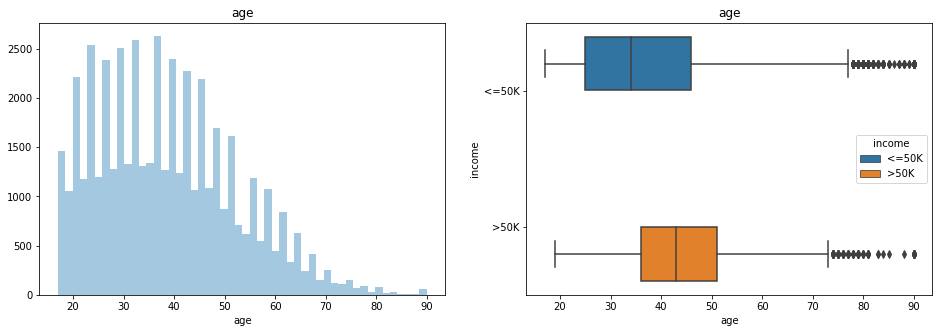

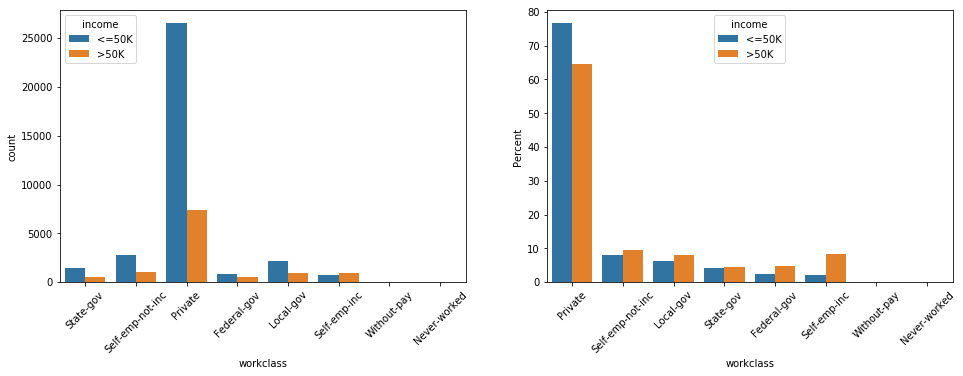

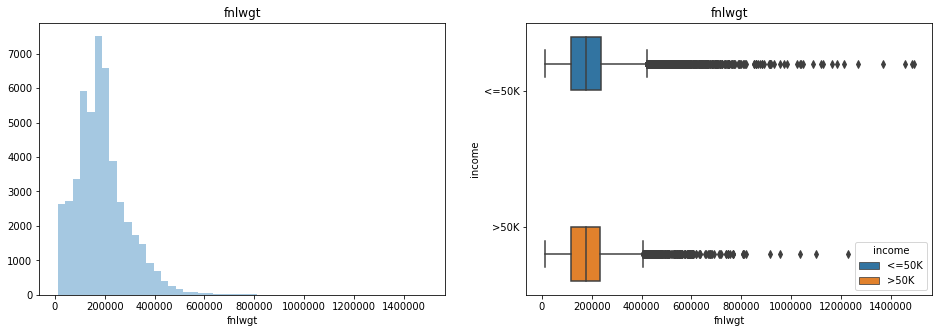

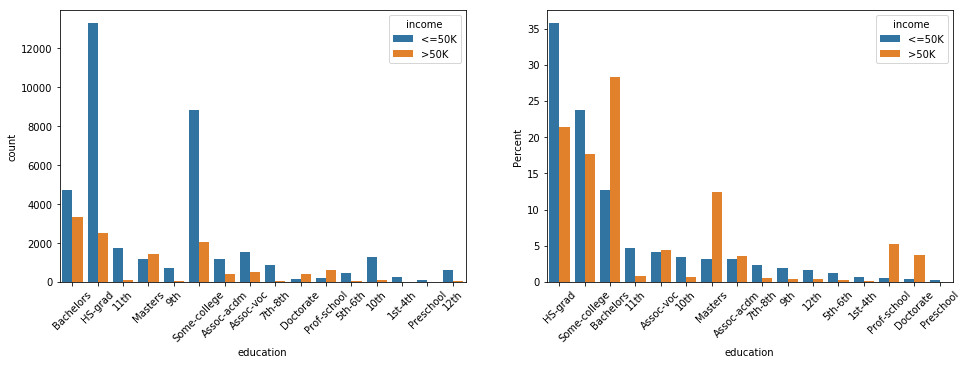

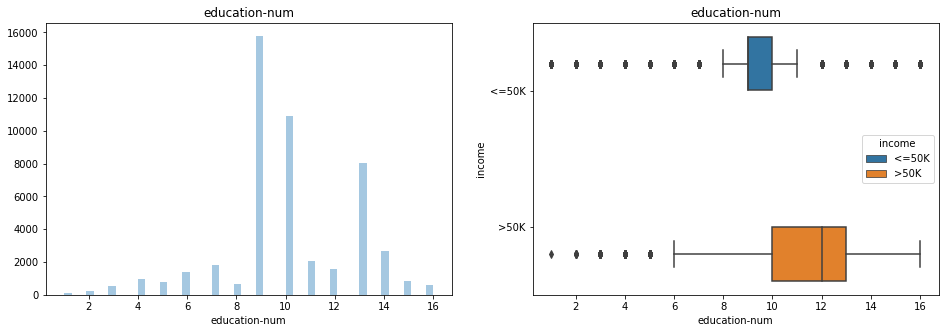

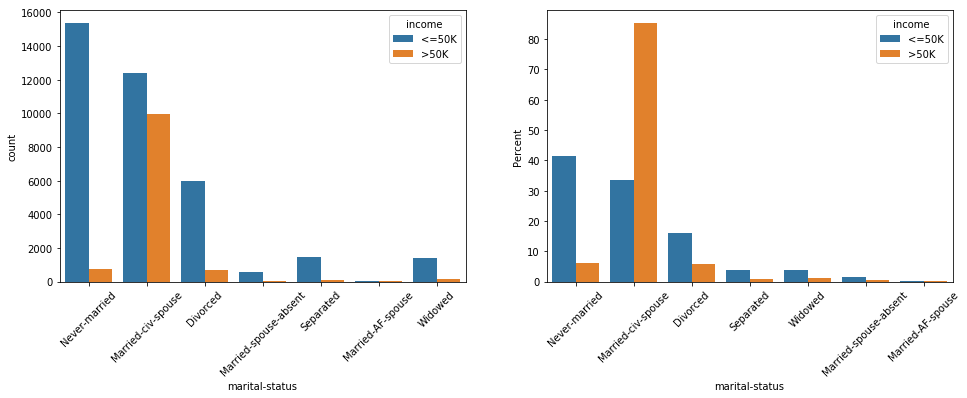

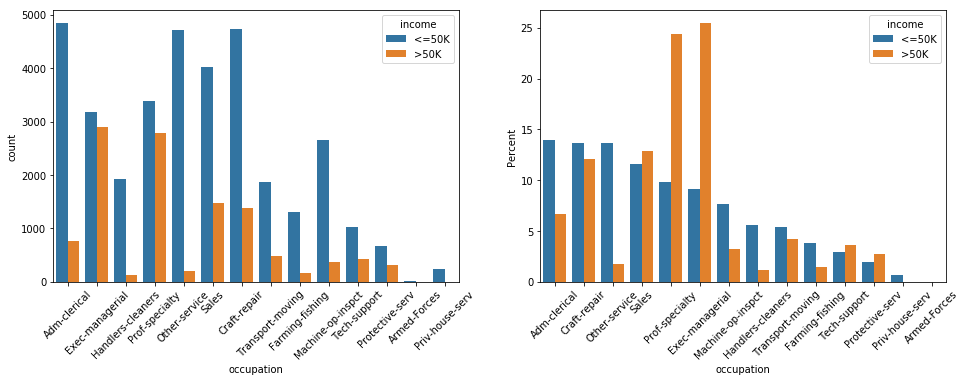

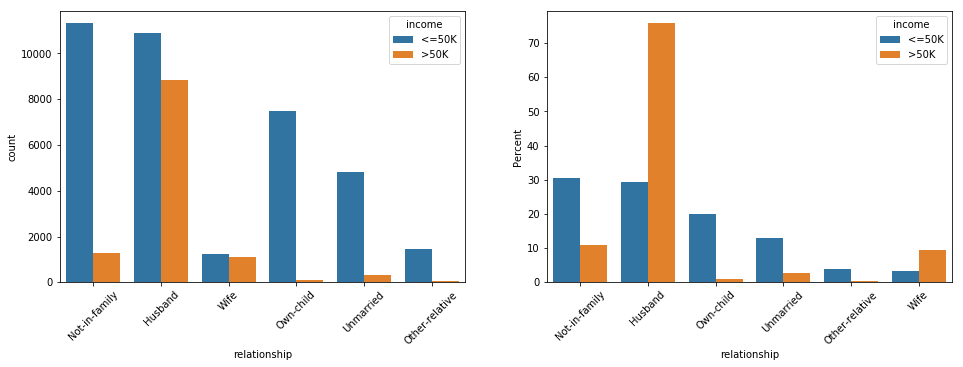

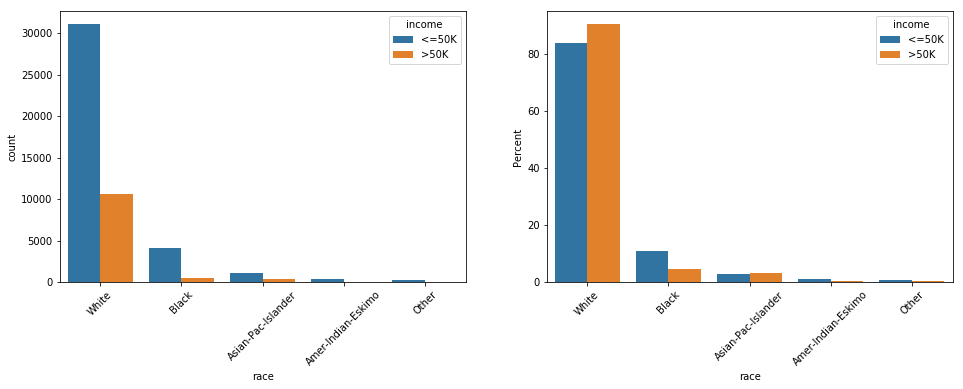

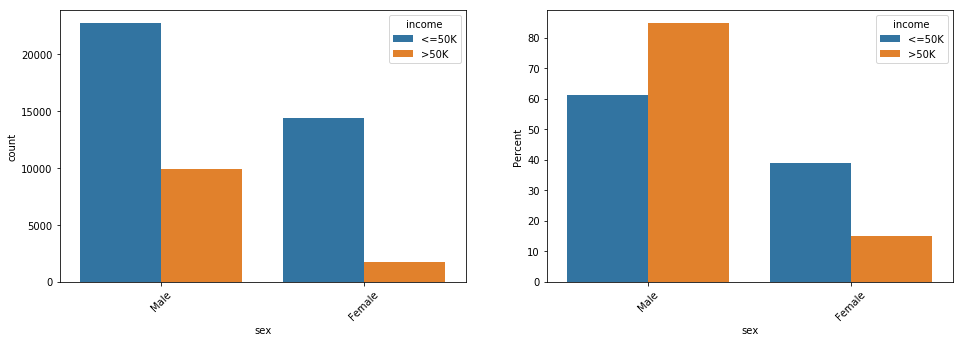

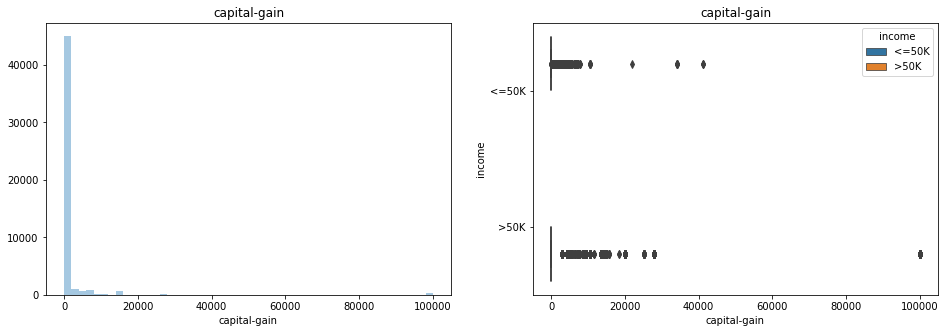

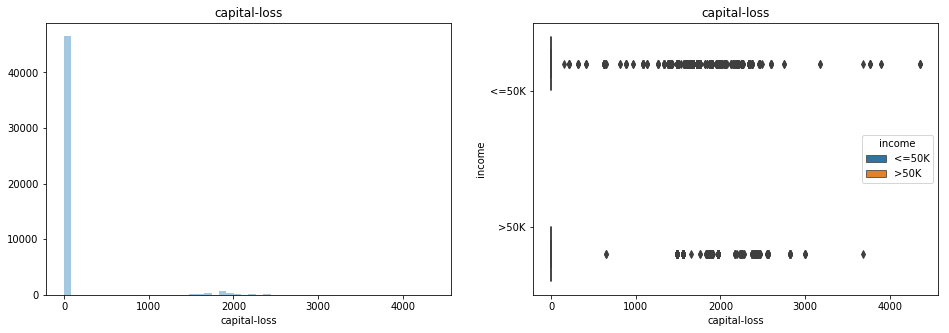

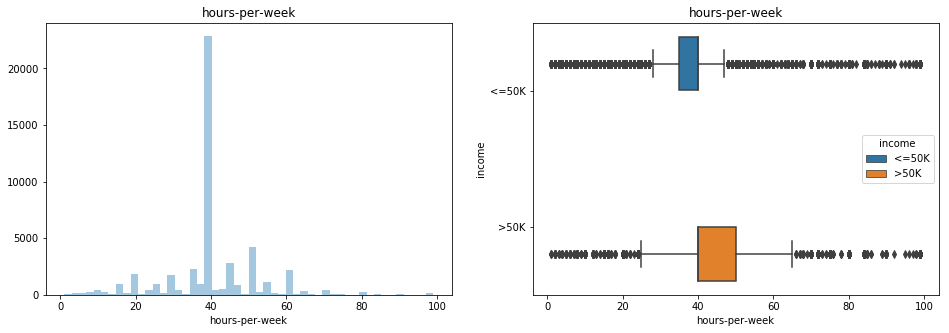

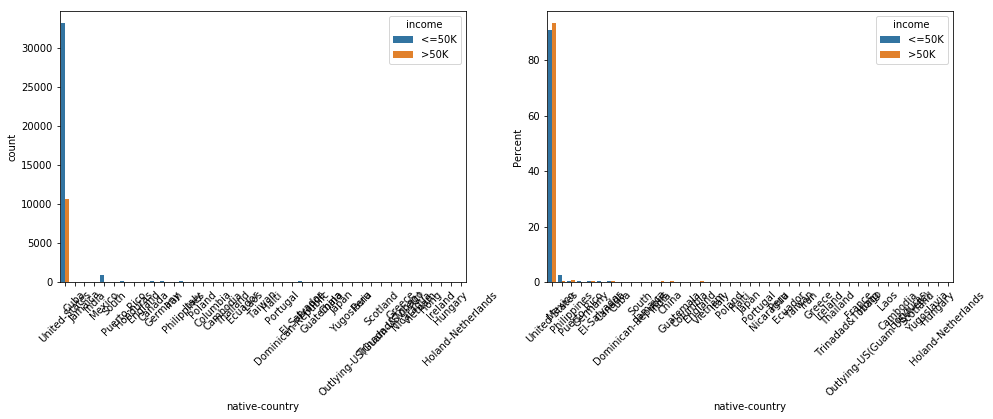

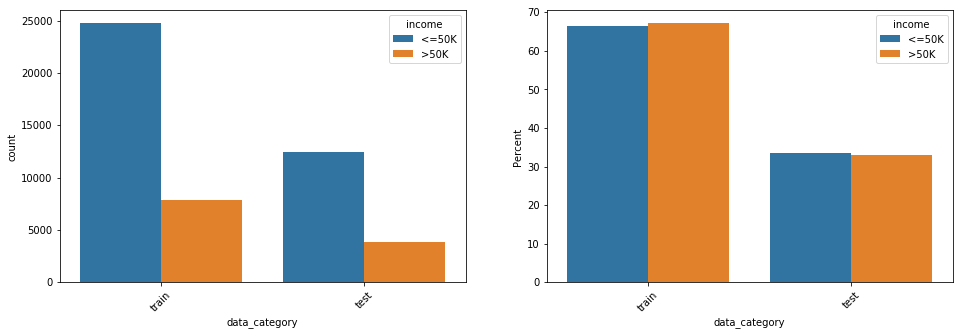

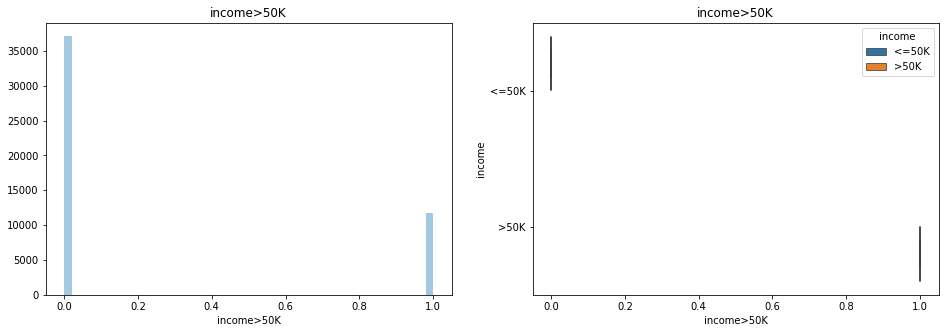

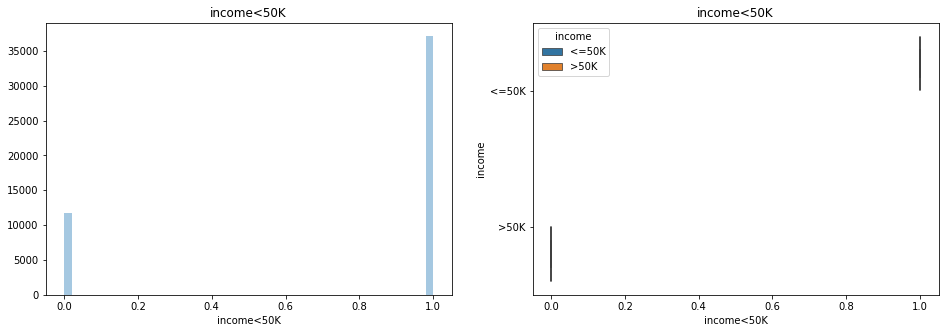

In [0]:
for i in df.columns:
    if df[i].dtype == 'O' and (i!='income'):
        x,y,hue = i,'Percent','income'
        hue_order = ['<=50K','>50K']

        plt.figure(figsize=(16,5))
        plt.subplot(1,2,1)
        sns.countplot(x=x,hue=hue, data=df)
        plt.xticks(rotation=45)

        percent_df = (df[i].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())
        percent_df[y] = round(percent_df[y]*100,2)

        plt.subplot(1,2,2)
        sns.barplot(x=x, y=y, hue=hue, data=percent_df)
        plt.xticks(rotation=45)
        
    elif i!='income':
        plt.figure(figsize=(16,5))
        plt.subplot(1,2,1)
        plt.title(i)
        sns.distplot(df[i], kde=False)
        
        plt.subplot(1,2,2)
        sns.boxplot(df[i], y=df['income'], hue=df['income'])
#         sns.violinplot(df[i], y=df['income'], hue=df['income'])
        plt.title(i)

# Feature Engineering

In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'data_category', 'income>50K', 'income<50K'],
      dtype='object')

## Workclass

In [0]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [0]:
round(df['workclass'].value_counts(normalize=True)*100,2)


Private             73.64
Self-emp-not-inc     8.39
Local-gov            6.81
State-gov            4.30
Self-emp-inc         3.68
Federal-gov          3.11
Without-pay          0.05
Never-worked         0.02
Name: workclass, dtype: float64

In [0]:
work = df.groupby('workclass').agg({'income>50K':sum,'income<50K':sum})

In [0]:
work

,income>50K,income<50K
workclass,,
Federal-gov,561,871
Local-gov,927,2209
Never-worked,0,10
Private,7387,26519
Self-emp-inc,938,757
Self-emp-not-inc,1077,2785
State-gov,530,1451
Without-pay,2,19


In [0]:
work['>50K_percent_of_total_in_group'] = round((work['income>50K']/(work['income>50K']+work['income<50K']))*100,2)

In [0]:
work

,income>50K,income<50K,>50K_percent_of_total_in_group
workclass,,,
Federal-gov,561,871,39.18
Local-gov,927,2209,29.56
Never-worked,0,10,0.00
Private,7387,26519,21.79
Self-emp-inc,938,757,55.34
Self-emp-not-inc,1077,2785,27.89
State-gov,530,1451,26.75
Without-pay,2,19,9.52


In [0]:
df['workclass'].replace(['Local-gov','State-gov'],'local_gov', inplace=True)

df['workclass'].replace(['Never-worked'],['Without-pay'], inplace=True)

df['workclass'].value_counts()

Private             33906
local_gov            5117
Self-emp-not-inc     3862
Self-emp-inc         1695
Federal-gov          1432
Without-pay            31
Name: workclass, dtype: int64

In [0]:
edu = df.groupby(['education','education-num']).agg({'income>50K':sum,'income<50K':sum}).sort_values(by=['education-num'], ascending=False).reset_index()
edu

,education,education-num,income>50K,income<50K
0,Doctorate,16,431,163
1,Prof-school,15,617,217
2,Masters,14,1459,1198
3,Bachelors,13,3313,4712
4,Assoc-acdm,12,413,1188
5,Assoc-voc,11,522,1539
6,Some-college,10,2063,8815
7,HS-grad,9,2503,13281
8,12th,8,48,609
9,11th,7,92,1720


In [0]:
edu['>50K_percent_of_total_in_group'] = round((edu['income>50K']/(edu['income>50K']+edu['income<50K']))*100,2)
edu

,education,education-num,income>50K,income<50K,>50K_percent_of_total_in_group
0,Doctorate,16,431,163,72.56
1,Prof-school,15,617,217,73.98
2,Masters,14,1459,1198,54.91
3,Bachelors,13,3313,4712,41.28
4,Assoc-acdm,12,413,1188,25.80
5,Assoc-voc,11,522,1539,25.33
6,Some-college,10,2063,8815,18.96
7,HS-grad,9,2503,13281,15.86
8,12th,8,48,609,7.31
9,11th,7,92,1720,5.08


In [0]:
edu['education'].unique()

array(['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Assoc-acdm',
       'Assoc-voc', 'Some-college', 'HS-grad', '12th', '11th', '10th',
       '9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool'], dtype=object)

In [0]:
df['education'].replace(['12th', '11th', '10th','9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool'],'dropout', inplace=True)

In [0]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
dropout          6408
Masters          2657
Assoc-voc        2061
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Name: education, dtype: int64

## Marital-Status


In [0]:
df['marital-status'].value_counts()


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [0]:
ms = df.groupby(['marital-status']).agg({'income>50K':sum,'income<50K':sum}).sort_values(by=['income>50K'], ascending=False).reset_index()
ms

,marital-status,income>50K,income<50K
0,Married-civ-spouse,9984,12395
1,Never-married,733,15384
2,Divorced,671,5962
3,Widowed,128,1390
4,Separated,99,1431
5,Married-spouse-absent,58,570
6,Married-AF-spouse,14,23


In [0]:
ms['>50K_percent_of_total_in_group'] = round((ms['income>50K']/(ms['income>50K']+ms['income<50K']))*100,2)
ms

,marital-status,income>50K,income<50K,>50K_percent_of_total_in_group
0,Married-civ-spouse,9984,12395,44.61
1,Never-married,733,15384,4.55
2,Divorced,671,5962,10.12
3,Widowed,128,1390,8.43
4,Separated,99,1431,6.47
5,Married-spouse-absent,58,570,9.24
6,Married-AF-spouse,14,23,37.84


In [0]:
df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married', inplace=True)
df['marital-status'].replace(['Divorced','Widowed','Separated','Married-spouse-absent'],'separated', inplace=True)
df['marital-status'].value_counts()

married          22416
Never-married    16117
separated        10309
Name: marital-status, dtype: int64

## Occupation

In [0]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'data_category', 'income>50K', 'income<50K'],
      dtype='object')

## Relationship

In [0]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [0]:
df[['marital-status','relationship','sex']].drop_duplicates()

,marital-status,relationship,sex
0,Never-married,Not-in-family,Male
1,married,Husband,Male
2,separated,Not-in-family,Male
4,married,Wife,Female
6,separated,Not-in-family,Female
8,Never-married,Not-in-family,Female
12,Never-married,Own-child,Female
16,Never-married,Own-child,Male
17,Never-married,Unmarried,Male
19,separated,Unmarried,Female


### Removing relationship column, as it is ambiguous, and majorly describe's the characteristics of the person who is filling the survey and not house-holder details

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,data_category,income>50K,income<50K
0,39,local_gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,train,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,train,0,1
2,38,Private,215646,HS-grad,9,separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,train,0,1
3,53,Private,234721,dropout,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,train,0,1
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,train,0,1


In [0]:
df.drop(['relationship'], axis=1, inplace=True)

In [0]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,data_category,income>50K,income<50K
0,39,local_gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K,train,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,United-States,<=50K,train,0,1
2,38,Private,215646,HS-grad,9,separated,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K,train,0,1


## Race

In [0]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

## Native-Country

In [0]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [0]:
country = df.groupby(['native-country']).agg({'income>50K':sum,'income<50K':sum}).sort_values(by=['income>50K'], ascending=False).reset_index()

In [0]:
country

,native-country,income>50K,income<50K
0,United-States,10694,33138
1,Philippines,85,210
2,Canada,63,119
3,India,62,89
4,Germany,58,148
5,England,47,80
6,Mexico,47,904
7,China,36,86
8,Italy,34,71
9,Cuba,34,104


In [0]:
country['>50K_percent_of_total_in_group'] = round((country['income>50K']/(country['income>50K']+country['income<50K']))*100,2)
country['total_people'] = country['income>50K']+country['income<50K']
country.sort_values(by=['total_people'], ascending=False).reset_index(drop=True)

,native-country,income>50K,income<50K,>50K_percent_of_total_in_group,total_people
0,United-States,10694,33138,24.40,43832
1,Mexico,47,904,4.94,951
2,Philippines,85,210,28.81,295
3,Germany,58,148,28.16,206
4,Puerto-Rico,20,164,10.87,184
5,Canada,63,119,34.62,182
6,El-Salvador,11,144,7.10,155
7,India,62,89,41.06,151
8,Cuba,34,104,24.64,138
9,England,47,80,37.01,127


In [0]:
country[(country['income>50K']>=30) | (country['>50K_percent_of_total_in_group']>=35)]['native-country'].unique()

array(['United-States', 'Philippines', 'Canada', 'India', 'Germany',
       'England', 'Mexico', 'China', 'Italy', 'Cuba', 'Japan', 'Taiwan',
       'Iran', 'Greece', 'France'], dtype=object)

In [0]:
top_country = ['United-States']

medium_country = ['Philippines', 'Canada', 'India', 'Germany',
                'England', 'Mexico', 'China', 'Italy', 'Cuba', 'Japan', 'Taiwan',
               'Iran', 'Greece', 'France']

remaining_country = list(set(df['native-country'].unique()) - set(top_country + medium_country))

In [0]:
df['native-country'].replace(top_country,'top', inplace=True)
df['native-country'].replace(medium_country,'medium', inplace=True)
df['native-country'].replace(remaining_country,'others', inplace=True)

In [0]:
df['native-country'].value_counts()

top       43832
medium     2580
others     2430
Name: native-country, dtype: int64

## Capital Gain and Loss

In [0]:
df.groupby(['income']).agg({'capital-gain':'mean'})

,capital-gain
income,
<=50K,147.010308
>50K,4042.239497


In [0]:
df.groupby(['income']).agg({'capital-loss':'mean'})

,capital-loss
income,
<=50K,54.151931
>50K,193.528964


In [0]:
df[['capital-gain','capital-loss']].drop_duplicates()

,capital-gain,capital-loss
0,2174,0
1,0,0
8,14084,0
9,5178,0
23,0,2042
32,0,1408
52,0,1902
59,5013,0
60,2407,0
84,14344,0


In [0]:
df[df['capital-gain']>0].shape

(4035, 17)

In [0]:
df[df['capital-loss']>0].shape

(2282, 17)

In [0]:
df['capital_loss_gain'] = df['capital-gain'] - df['capital-loss']

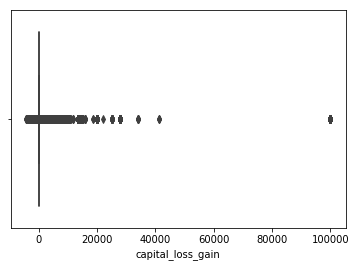

In [0]:
sns.boxplot(df['capital_loss_gain'])

In [0]:
a = np.nanpercentile(df['capital_loss_gain'],0)
b = np.nanpercentile(df['capital_loss_gain'],2)
c = np.nanpercentile(df['capital_loss_gain'],5)
d = np.nanpercentile(df['capital_loss_gain'],90)
e = np.nanpercentile(df['capital_loss_gain'],95)
f = np.nanpercentile(df['capital_loss_gain'],100)

In [0]:
bins = [-np.inf,b,c,d,e,f,np.inf]
labels = ['loss_2','loss_1','neutral','gain_1','gain_2']
df['capital_category'] = pd.cut(df['capital_loss_gain'], bins=bins, labels=labels, include_lowest=True, right=False, duplicates='drop')

In [0]:
df['capital_category'].value_counts()

neutral    44109
gain_1      2207
loss_1      1470
loss_2       812
gain_2       244
Name: capital_category, dtype: int64

## Age

In [0]:
bins = [-np.inf, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, np.inf]
labels = ['less_20','20_25','25_30','30_35','35_40','40_45','45_50','50_55','55_60','60_65','more_65']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True, right=False)

In [0]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'data_category', 'income>50K', 'income<50K', 'capital_loss_gain',
       'capital_category'],
      dtype='object')

In [0]:
df.drop(['education-num','capital-gain','capital-loss','capital_loss_gain','income>50K',
         'income<50K'],axis=1,inplace=True)

# Missing values imputation

# Total number of missing values

In [0]:
df.isnull().sum()

age                    0
workclass           2799
fnlwgt                 0
education              0
marital-status         0
occupation          2809
race                   0
sex                    0
hours-per-week         0
native-country         0
income                 0
data_category          0
capital_category       0
dtype: int64

## Label Encoding

In [0]:
columns_for_label_encoding = ['education','marital-status','race','sex','native-country','income','age','capital_category']
le=LabelEncoder()
for x in columns_for_label_encoding:
  df[x] = le.fit_transform(df[x])
  
columns_for_label_encoding_missing = ['workclass','occupation']
for x in columns_for_label_encoding_missing:
  series = df[x].dropna().values
  le.fit_transform(series)
  embedding_map = dict(zip(le.classes_, le.transform(le.classes_)))
  df[x] = df[x].map(embedding_map)
  
  

In [0]:
d1=df.dropna()
d1.drop(["data_category"],axis=1,inplace=True)
d1.reset_index(drop=True,inplace=True)
d2=d1.copy(deep=True)

## Adding Random Missing Values

In [0]:
index_work = d1.sample(200).index.values
Occupation = d1.sample(300).index.values

In [0]:
d1 = d1.set_value(index_work, 'workclass', np.NAN)
d1 = d1.set_value(Occupation, 'occupation', np.NAN) 

In [0]:
X_filled_ii = IterativeImputer().fit_transform(d1)
d1_filled = pd.DataFrame(X_filled_ii)
d1_filled.columns = d1.columns

In [0]:
d1_filled.workclass=d1_filled.workclass.apply(lambda x: math.floor(x))
pd.unique(d1_filled.workclass)

array([5, 3, 1, 0, 2, 4])

## Comparing Results

In [0]:
def comparer(v1,v2):
  if v1==v2:
    return 1
  else:
    return 0

d1_filled=d1_filled[d1_filled.index.isin(index_work)]
d1_original = d2[d2.index.isin(index_work)]

compare = pd.DataFrame({"Actuals":d1_original.workclass,"Imputed":d1_filled.workclass})

compare.apply(lambda x: comparer(x.Actuals,x.Imputed),axis=1).sum()/200

0.735

## Applying on original data frame

In [0]:
df2 = df.drop(['data_category'],axis=1)

X_filled_ii = IterativeImputer().fit_transform(df2)

d1_filled = pd.DataFrame(X_filled_ii)
d1_filled.columns = d1.columns

d1_filled.workclass=d1_filled.workclass.apply(lambda x: math.floor(x))
d1_filled.occupation=d1_filled.occupation.apply(lambda x: math.floor(x))

In [0]:
d1_filled['data_category'] = df['data_category']

In [0]:
d1_filled.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
race                0
sex                 0
hours-per-week      0
native-country      0
income              0
capital_category    0
data_category       0
dtype: int64

# Classification Models

## Model building Desicion tree, RF Tree, Extra Trees, XG BOOST, GBM, LGBM, Voting classifier, recursive feature engineering Grid search and Random Search 

In [0]:
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [0]:
# Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Metric Builder

In [0]:
def metric_builder(y_pred,y_test):
  print("Confusion Matrix")
  print(confusion_matrix(y_pred,y_test))
  print("Metrics")
  print("Accuracy",accuracy_score(y_pred,y_test))
  print("precision_score",precision_score(y_pred,y_test))
  print("recall_score",recall_score(y_pred,y_test))

In [0]:
d2 = d1_filled.drop("data_category",axis=1)

In [0]:
X= d2.drop(['income'],axis=1)
Y= d2[['income']]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=31)

## Model object

In [0]:
dst = DecisionTreeClassifier()
rf = RandomForestClassifier()
ext = ExtraTreesClassifier()
xgb = XGBClassifier()
gbm = GradientBoostingClassifier()
lgb = LGBMClassifier()
# vc = VotingClassifier()

## DecisionTree

In [0]:
dst.fit(X_train,y_train)
y_pred = dst.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[12841  1962]
 [ 1965  2769]]
Metrics
Accuracy 0.7989967753493371
precision_score 0.585288522511097
recall_score 0.5849176172370089


## Precision

In [0]:

2536/(2536+2195)

0.5360388924117523

## Recall



In [0]:
2536/(2020+2536)

0.5566286215978928

## RandomForest

In [0]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13661  2070]
 [ 1145  2661]]
Metrics
Accuracy 0.8354404463325997
precision_score 0.5624603677869372
recall_score 0.6991592222806096


## ExtraTrees

In [0]:
ext.fit(X_train,y_train)
y_pred = ext.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13504  1992]
 [ 1302  2739]]
Metrics
Accuracy 0.8313968367712545
precision_score 0.5789473684210527
recall_score 0.6778025241276912


## XGBClassifier

In [0]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13877  1914]
 [  929  2817]]
Metrics
Accuracy 0.8544812407227312
precision_score 0.595434369055168
recall_score 0.7520021356113188


## GradientBoostingClassifier

In [0]:
gbm.fit(X_train,y_train)
y_pred = gbm.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13871  1907]
 [  935  2824]]
Metrics
Accuracy 0.8545324256538875
precision_score 0.5969139716761784
recall_score 0.7512636339451982


## LGBMClassifier

In [0]:
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13770  1786]
 [ 1036  2945]]
Metrics
Accuracy 0.8555561242770129
precision_score 0.6224899598393574
recall_score 0.7397638784225069


## VotingClassifier

In [0]:
vc = VotingClassifier(estimators=[('clf1',lgb),('clf2',gbm),('clf3',xgb),('clf4',rf),('clf5',ext)])
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
metric_builder(y_pred,y_test)

Confusion Matrix
[[13880  1882]
 [  926  2849]]
Metrics
Accuracy 0.8562727133132005
precision_score 0.6021982667512153
recall_score 0.7547019867549669


## Feature Importance

Text(0.5, 0, 'Relative Importance')

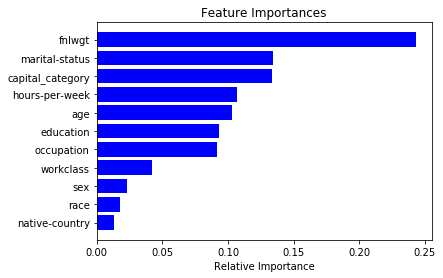

In [0]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


# Feature Elimination using Recursive Feature elimintaion

In [0]:
from sklearn.feature_selection import RFECV

In [0]:
RFE=RFECV(rf,step=3,cv=5,n_jobs=7)
RFE.fit(X=X_train,y=y_train)

RFECV(cv=5,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=7, scoring=None, step=3, verbose=0)

In [0]:
RFE.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [0]:
dict(zip(df.columns,RFE.support_))

{'age': True,
 'education': True,
 'fnlwgt': True,
 'hours-per-week': True,
 'income': True,
 'marital-status': True,
 'native-country': True,
 'occupation': True,
 'race': True,
 'sex': True,
 'workclass': True}

# Parameter Tunning using Grid search and Random search

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
params = {"max_depth":[2,4,6,7],'n_estimators':[200,300,400],"max_leaf_nodes":[5,6,10]}

In [0]:
GSCV = GridSearchCV(rf,param_grid=params,scoring="accuracy",cv=3)

In [0]:
GSCV.fit(X_train,y_train)

In [0]:
GSCV.best_estimator_

In [0]:
GSCV.best_estimator_.fit(X_train,y_train)
metric_builder(y_pred,y_test)

In [0]:
RSE= RandomizedSearchCV(rf,param_distributions=params,error_score="accuracy",cv=3)

In [0]:
RSE.fit(X_train,y_train)

In [0]:
RSE.best_estimator_

In [0]:
RSE.best_estimator_.fit(X_train,y_train)

In [0]:
y_pred=RSE.best_estimator_.predict(X_test)

In [0]:
metric_builder(y_pred,y_test)